In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pot(T, P):
    T = T + 273
    theta = T*(1000/P)**(287/1005)
    return(theta)
def teq(theta, q, T_LCL):
    T_LCL = T_LCL + 273
    theta_e = theta*np.exp((2.25**6*q)/(1005*T_LCL))
    return(theta_e)
def teqs(theta, qs, T_P):
    T_P = T + 273
    theta_es = theta*np.exp((2.25**6*qs)/(1005*T_P))
    return(theta_es)

**potential temperature**

In [3]:
theta_list = [pot(30.4, 984), pot(25, 900), pot(19, 800), pot(10.4, 700), pot(1.5, 600), pot(-7.1, 500),
                      pot(-16.3, 400), pot(-31.5, 300), pot(-53.3, 200), pot(-74.7, 100)]
theta_list = np.array(theta_list)
theta_list

array([304.80071482, 307.1024835 , 311.21294348, 313.78742118,
       317.61146486, 324.10379566, 333.47743183, 340.59379918,
       347.88557113, 382.73206932])

In [4]:
theta_e_list = [(teq(304.80071482, 18.82, 24), 
                 teq(307.1024835, 14.00, 18),
                 teq(311.21294348, 9.00, 7),
                 teq(313.78742118, 7.03, 2),
                 teq(317.61146486, 5.50, -4),
                 teq(324.10379566, 3.04, -12),
                 teq(333.47743183, 1.88, -20),
                 teq(340.59379918, .30, -42))]
theta_e_list = np.array(theta_e_list)
theta_e_list

array([[307.30443525, 309.01584411, 312.5070576 , 314.8247204 ,
        318.45094212, 324.59151818, 333.79749902, 340.65090909]])

In [5]:
import metpy.calc as mpcalc
from metpy.units import units

**saturation equivalent potential temperature**

In [6]:
print(mpcalc.saturation_equivalent_potential_temperature(984 * units.hPa, (30.4+273) * units.K),
mpcalc.saturation_equivalent_potential_temperature(900 * units.hPa, (25+273) * units.K),
mpcalc.saturation_equivalent_potential_temperature(800 * units.hPa, (19+273) * units.K),
mpcalc.saturation_equivalent_potential_temperature(700 * units.hPa, (10.4+273) * units.K),
mpcalc.saturation_equivalent_potential_temperature(600 * units.hPa, (1.5+273) * units.K),
mpcalc.saturation_equivalent_potential_temperature(500 * units.hPa, (-7.1+273) * units.K),
mpcalc.saturation_equivalent_potential_temperature(400 * units.hPa, (-16.3+273) * units.K),
mpcalc.saturation_equivalent_potential_temperature(300 * units.hPa, (-31.5+273) * units.K),
mpcalc.saturation_equivalent_potential_temperature(200 * units.hPa, (-53.3+273) * units.K),
mpcalc.saturation_equivalent_potential_temperature(100 * units.hPa, (-74.7+273) * units.K))

391.3655158205017 kelvin 375.49100885228216 kelvin 364.80969141047365 kelvin 349.0636945402746 kelvin 340.3190393086456 kelvin 339.066179727645 kelvin 342.958178490627 kelvin 344.14222296160284 kelvin 348.5399811473949 kelvin 382.93734038323436 kelvin


**equivalent potential temperature**

In [7]:
print(mpcalc.equivalent_potential_temperature(984 * units.hPa, (30.4+273) * units.K, (23.4+273) * units.K),
      mpcalc.equivalent_potential_temperature(900 * units.hPa, (25+273) * units.K, (18+273) * units.K),
      mpcalc.equivalent_potential_temperature(800 * units.hPa, (19+273) * units.K, (8.0+273) * units.K),
      mpcalc.equivalent_potential_temperature(700 * units.hPa, (10.4+273) * units.K, (3.4+273) * units.K),
      mpcalc.equivalent_potential_temperature(600 * units.hPa, (1.5+273) * units.K, (-2.5+273) * units.K),
      mpcalc.equivalent_potential_temperature(500 * units.hPa, (-7.1+273) * units.K, (-12.1+273) * units.K),
      mpcalc.equivalent_potential_temperature(400 * units.hPa, (-16.3+273) * units.K, (-20.5+273) * units.K),
      mpcalc.equivalent_potential_temperature(300 * units.hPa, (-31.5+273) * units.K, (-42.5+273) * units.K))

360.568627322195 kelvin 350.9193743458187 kelvin 337.29682942266555 kelvin 335.75871986779816 kelvin 334.7261290780495 kelvin 334.3733333817335 kelvin 340.2370910674367 kelvin 341.8671688455725 kelvin


In [8]:
P = [984, 900, 800, 700, 600, 500, 400, 300, 200, 100]
te = [360.568627322195, 350.9193743458187, 337.29682942266555, 335.75871986779816, 334.7261290780495, 334.3733333817335, 340.2370910674367, 341.8671688455725,348.5399811473949, 382.93734038323436]
P_te = [984, 900, 800, 700, 600, 500, 400, 300]
tes = [391.3655158205017, 375.49100885228216, 364.80969141047365, 349.0636945402746, 340.3190393086456, 339.066179727645, 342.958178490627, 344.14222296160284,348.5399811473949, 382.93734038323436] 

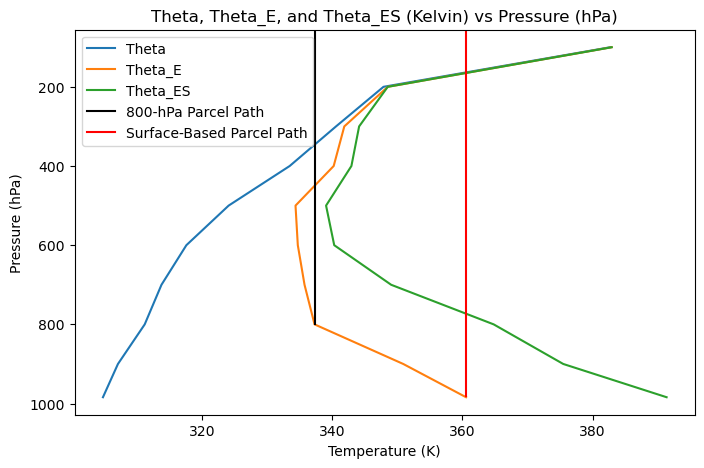

In [18]:


fig = plt.figure(figsize=(8,5))
ax = plt.subplot(1,1,1)
ax.invert_yaxis()
ax.set_title('Theta, Theta_E, and Theta_ES (Kelvin) vs Pressure (hPa)')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (hPa)')
ax.plot(theta_list, P, label='Theta')
ax.plot(te, P, label='Theta_E')
ax.plot(tes, P, label='Theta_ES')
ax.axvline(x=337.29682942266555, ymin=.235, ymax=1, color='k', label='800-hPa Parcel Path')
ax.axvline(x=360.568627322195, ymin=.048, ymax=1, color='r', label='Surface-Based Parcel Path')
ax.legend()